In [28]:
#install.packages('ggplot2', dependencies = TRUE, repos = "http://cran.us.r-project.org")
#install.packages('readr', dependencies = TRUE, repos = "http://cran.us.r-project.org")
#install.packages('dplyr', dependencies = TRUE, repos = "http://cran.us.r-project.org")
#install.packages('DescTools', dependencies = TRUE, repos = "http://cran.us.r-project.org")
#install.packages('visNetwork', dependencies = TRUE, repos = "http://cran.us.r-project.org")

In [29]:
library(DescTools)
library(ggplot2)
library(readr)
suppressWarnings(library(dplyr))
library(visNetwork)

# Dnevni pregled borze Bitstamp

Vse funkcije podpirajo vse valutne pare oz. valute na borzi Bitstamp.

Razpoložljivi valutni pari oz. flowi (vrstni red v paru pomemben za pravilno delovanje funkcij):

- btceur
- btcusd
- ethbtc
- etheur
- ethusd
- eurusd
- ltcbtc
- ltceur
- ltcusd
- xrpbtc
- xrpeur
- xrpud


### Navodila za uporabo:

- vnesi željen datum z vnosom  spodnje polje (OPOMBA: trenutno je v bazi podatkov le en dan, in sicer 18.08.2017) 
- v zgornjem meniju izberi "Cell" in nato "Run all"
- pognale se bodo vse spodnje funkcije. Tabele in grafi bodo prikazovali podatke za izbran default_par (par se lahko spremeni z vnosom v polje spodaj, za razpoložljive pare glej seznam zgoraj).
- če Jupyter notebook javi, da katera od potrebnih knjižnic ni naložena, se lahko v povsem zgornjem polju odkomentira (pobriše # na začetku vrstice) posamezne vrstice. Celico naj se požene in knjižnice se bodo naložile


- alternativno se lahko pri vsaki funkciji posebej spremeni argumente (valutni par, valuta, velikost bucketa...). Za zagon take funkcije nato klikni na željeno polje (celico) in v meniju izberi "cell" in nato "Run cells" (pognalo se bo samo izbrano polje/celica)
- pri nekaterih funkcijah lahko pride pri spremembi valutnega para do slabo in nesmiselno skaliranih grafov. V ta namen imajo nekatere funkcije posebej argumente, s katerimi se lahko graf spremeni v smiselno velikost. Če se opazi, da kateri graf vseeno ne deluje "uredu", prosim za opozorilo in bom popravil.
- opis, vhodni argumenti (ki jih je možno spreminjati) in pomen grafov(ter tabel) so razloženi pri vsaki funkciji posebej (glej spodaj)
- celice/polja z oznako #KODA ignoriraj, za uporabnika namreč niso pomembne

In [30]:
#vnesi željen datum (DD.MM.YYYY) in default valutni par:
datum = "14.09.2017"
default_par = "btceur"

### Primer zajetih podatkov o valutnem paru (seznam vseh izvedenih transakcij/tradeov v zadnjih 24 urah):

Pomen stolpcev:
- date: datum (unix format)
- tid: id transakcije
- price: cena izražena v enotah druge valute v paru
- amount: količina tokenov v transakciji (v enotah prve valute v paru)
- type: tip transakcije, 0 pomeni 'buy' in  1 pomeni 'sell'

In [31]:
example <- read.csv(paste(datum, '/', default_par, '.csv', sep=''), header=T)
head(example)

date,tid,price,amount,type
1505433671,21261027,2734.28,0.40965277,0
1505433669,21261019,2741.00,0.21676732,0
1505433668,21261017,2740.99,1.48925281,1
1505433668,21261015,2737.68,0.02263000,0
1505433668,21261013,2734.29,0.27807929,0
1505433666,21261011,2730.66,0.06127477,0


### 1) Vizualizacija in tabela valutnih tokov (flowov) 

VPRAŠANJE (alineja) IZ MAILA: 
##### - za bitstamp, bitfinex, binance slike top 10 valut + tabelca da vidimo kaj pomenijo debeline povezav in velikosti balonckov

OPIS: Tabela prikaže podatke o enosmernih flowih (ločeno je npr.BTCETH in ETHBTC) za izbran dan (24 ur) na borzi. Podatki so nato prikazani v obliki grafa. Graf se da preoblikovati v bolj pregledno obliko s klikom na vozlišče in premikom (click, hold and move/drag). Za podatke o povezavi (oz. vozlišču) klikni na povezavo oz. vozlišče ali se samo zapelji čez z miško. Graf se da tudi premakniti in povečati/zmanjšati z uporabo miške.

POMEN STOLPCEV:

- volume: dnevni promet na izbranem flowu v USD
- combo: flow (prva --> druga)
- nr_tokens: dnevni promet na izbranem flowu v tokenih (če je v paru ena fiat in ena kripto valuta, potem izraženo v enotah/tokenih kripto valute; če sta v paru dve kripo valuti, izraženo v enotah/tokenih valute, ki ni BTC)
- priceUSD: povprečna cena po kateri je bila izvedena transkacija na izbranem flowu v tistem dnevu (če je v paru ena fiat in ena kripto valuta, potem izraženo v USD ceni kripto valute; če sta v paru dve kripo valuti, izraženo v USD ceni kripto valute, ki ni BTC)
- nr_txs: število transakcij v tistem dnevu na izbranem flowu


VHODNI ARGUMENTI: datum (globalna spremenljivka, nastavi zgoraj)


In [32]:
tabela <- read.csv(paste(datum,"/tidy.csv", sep=""), header=T, as.is=T)
tabela

Warning message in file(file, "rt"):
"cannot open file '14.09.2017/tidy.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


##### Število transakcij v zadnjih 24 urah:

In [ ]:
sum(tabela$nr_txs)

##### Skupni volume v zadnjih 24 urah (izražen v USD):

In [ ]:
prettyNum(round(sum(tabela$volume),2), big.mark=',', scientific=FALSE)

In [ ]:
#KODA
nodes <- read.csv(paste(datum, '/vozli.csv', sep=''), header=T, as.is=T)
links <- read.csv(paste(datum,"/tidy.csv", sep=""), header=T, as.is=T)
links$normVolume <- scale(links$volume) + 2
links$normTxs <- scale(links$nr_txs) + 2
links <- links[,c('prva', 'druga', 'nr_tokens', 'priceUSD', 'nr_txs', 'normVolume', 'normTxs', 'combo', 'volume')]
velikost <- links %>% select(druga, volume) %>% group_by(druga) %>% summarise(volume = sum(volume))
colnames(velikost)[1] <- "currency"
nodes <- merge(velikost, nodes, by='currency')


AVG = sum(nodes$volume)/dim(nodes)[1]
SD = sd(nodes$volume)
nodes$norm <- ((nodes$volume - AVG)/SD + 1) * 10
AVG2 = sum(links$volume)/dim(links)[1]
SD2 = sd(links$volume)
links$width <- abs((links$volume - AVG2)/SD2) + 0.5

nodes['label'] <- nodes['currency']
colnames(nodes)[1] <- "id"
colnames(links)[1] <- "from"
colnames(links)[2] <- "to"
colnames(nodes)[4] <- 'size'

#prettyNum(12345.678,big.mark=",",scientific=FALSE)

nodes$title <- paste(nodes$label, "<br>",
                     "<b>Daily volume: </b>", prettyNum(round(nodes$volume,2), big.mark=',', scientific=FALSE), "$") 
nodes$color.background <- c("slategrey", "tomato")[nodes$currencyType]
links$title <- paste("<b>Flow:</b>", links$combo, "<br>", 
                            "<b>Volume:</b>", prettyNum(round(links$volume,2), big.mark=',', scientific=FALSE), "$<br>",
                            "<b>Nr txs:</b>", links$nr_txs, "<br>",
                            "<b>Avg daily price:</b>", round(links$priceUSD,2),'$')

visNetwork(nodes, links, main='BITSTAMP')  %>% 
  visOptions(highlightNearest = TRUE, nodesIdSelection = TRUE) %>% visIgraphLayout(smooth=TRUE)

### 2) Porazdelitev transakcij na valutni par 

In [ ]:
#KODA
porazdelitev <- function(par, velikost_bucketa, x, y) {
    ime <- paste(datum, '/', par, '.csv', sep='')
    df <- read.csv(ime, header=T)
    df['class'] <- df['amount'] %/% velikost_bucketa
    tmp <- df %>% select(class, amount) %>% group_by(class) %>% summarise(nr = length(amount))
    print(Desc(df$class * velikost_bucketa, main = "Velikost transakcij", plotit = F, verbose=1))
    graf <- ggplot(data = tmp, mapping = aes(x = class * velikost_bucketa, y = nr)) + geom_col() +
        labs(x = "velikost transakcije", y = "število transakcij") + xlim(-0.01, x) + ylim(0, y) + 
        ggtitle(paste('Porazdelitev velikosti transakcij za ', toupper(par), sep=''))
    return (graf)
    }

VPRAŠANJE (alineja) IZ MAILA: 
##### - ce podprem nek par, kaksne menjave pricakujem (recimo porazdelitev nakupov btcja po velikosti, lahko diskretizirano po npr. X bucketih) 

OPIS: tabela na začetku pokaže podatke o porazdelitvi v "številski" obliki (če je bucketov preveč našteje le nekaj najmanjših in največjih vrednosti). Graf prikaže porazdelitev po bucketih. Za smiselen in nazoren graf upravljaj s parametri velikost bucketa, x in y (dolžini obeh osi).

Če sta v paru dve kriptovaluti, se diskretizira po velikosti tokena valute, ki ni BTC (za par xrpbtc se torej diskretizira po velikosti xrp).

VHODNI ARGUMENTI (spreminjaj v polju spodaj, nato poženi prek "cell" in nato "run cells"): 


- par: za prikaz drugega valutnega para vnesi v drug par v obliki stringa (npr. 'xrpeur')
- velikost bucketa: velikost transakcije (glede na velikost tokena) po kateri se gleda porazdelitev velikosti
- x: dolžina x-osi na grafu
- y: dolžina y-osi na grafu

------------------------------------------------------------------------------ 
Velikost transakcij

      length         n     NAs    unique        0s      mean     meanCI
       4'726     4'726       0       877       103  2'916.13   2'672.06
                100.0%    0.0%                2.2%             3'160.19
                                                                       
         .05       .10     .25    median       .75       .90        .95
       32.50    100.00  330.00  1'230.00  3'020.00  6'590.00  10'000.00
                                                                       
       range        sd   vcoef       mad       IQR      skew       kurt
  422'570.00  8'558.33    2.93  1'556.73  2'690.00     27.84   1'246.95
                                                                       
lowest : 0.0 (103), 10.0 (10), 20.0 (11), 30.0 (113), 40.0 (61)
highest: 82'470.0, 107'220.0, 112'220.0, 114'530.0, 422'570.0



Warning message:
"Removed 779 rows containing missing values (position_stack)."

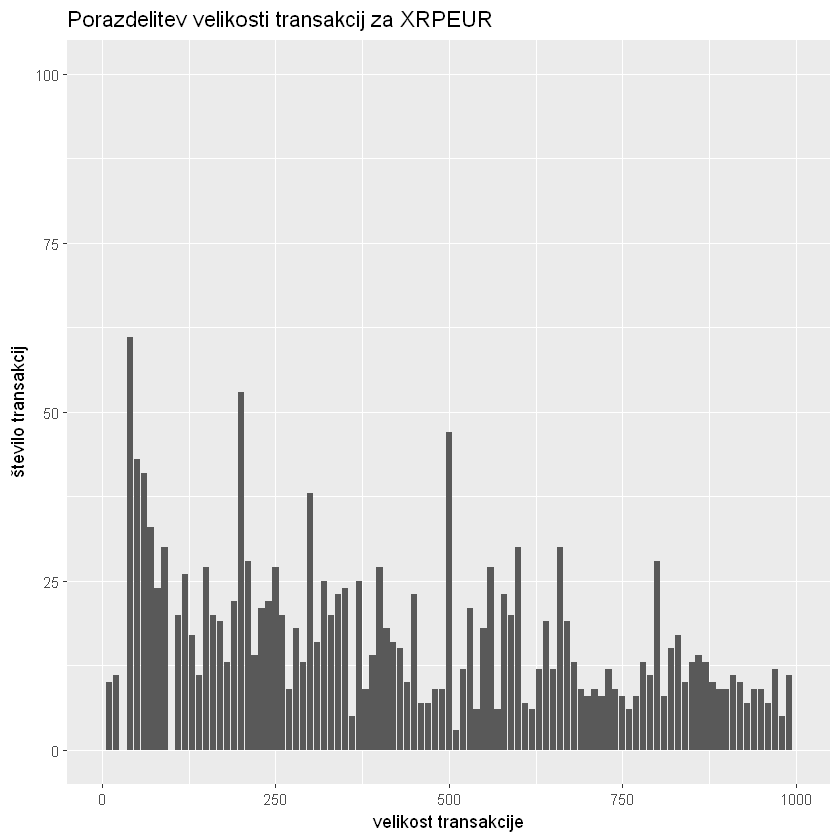

In [33]:
#porazdelitev(par, velikost bucketa, x, y)
porazdelitev('xrpeur', 10, 1000, 100)

### 3) Skalabilnost po urah 

In [ ]:
#KODA
skalabilnost <- function(par, ctrl) {
    ime <- paste(datum, '/', par, '.csv', sep='')
    data <- read.csv(ime, header=T)
    data['class'] <- data['amount'] %/% 1
    data$date2 <- as.POSIXct(data$date,origin="1970-01-01",tz="GMT")
    tmp <- split(data, cut(strptime(data$date2, format="%F %R"),"hour"))
    df <- data.frame(Date=as.Date(as.character()), sum=numeric(), max=numeric(), min=numeric(),
                     avg=numeric(), count=numeric(), stringsAsFactors=FALSE)
    for (ura in tmp) {
    vec <- c(ura$date2[[1]], sum(ura$amount), min(ura$amount), max(ura$amount),
                mean(ura$amount), length(ura$amount))
    df <- rbind(df, vec)
    }
    colnames(df)<- c("date","sum","min", "max", "mean", "count")
    df$date2 <- as.POSIXct(df$date,origin="1970-01-01",tz="GMT")
    df$date <- NULL
    p <- ggplot(df, aes(x = date2)) + geom_line(aes(y = count, colour = "Število transakcij"),size=1.2)
    p <- p + geom_line(aes(y = mean*ctrl, colour = "Povprečna transakcija"), size=1.2)
    p <- p + scale_y_continuous(sec.axis = sec_axis(~./ctrl, name = "Povprečna transakcija"))
    p <- p + scale_colour_manual(values = c("blue", "red"))
    p <- p + labs(y = "Število transakcij", x = "Datum in ura")
    p <- p + theme(legend.position = c(0.8, 0.9))
    p <- p + ggtitle(paste('Skalabilnost po urah za ', toupper(par), sep=''))
    print(p)
    return(df)
}

VPRAŠANJE (alineja) IZ MAILA: 
##### - koliko total tradeov je na uro, max, min, povpr. (skalabilnost sistema), kaj je bil max (peak) na minuto
##### -  kdaj je najvec dela ce si borza (bitstamp vs binance vs bitfinex) - ali se da kaj generalno povedati ali je odvisno od tega kje si kot borza

OPIS: tabela prikaže podatke za izbrani valutni par na urni ravni. Graf prikaže število transakcij in povprečno velikost transakcije (glede na število tokena, ki je bil "izmenjan" v transakciji) za vsako uro, torej stolpca mean in count iz tabele. Pazi na dvojno y-skalo pri grafu.

POMEN STOLPCEV:

- sum: število (vsota) tokenov, ki so bili izmenjani v dani uri, na izbranem flowu (če je v paru ena fiat in ena kripto valuta, potem izraženo v številu kripto valute; če sta v paru dve kripto valuti, izraženo v številu kripto valute, ki ni BTC --> enako velja za spodnje alineje)
- min: najmanjša izvedena transakcija v dani uri 
- max: največja izvedena transakcija v dani uri
- mean: povprečna transakcija v dani uri (glede na velikost tokena)
- count: število vseh transakcij v dani uri
- date2: datum in ura, za katero veljajo podatki v stolpcu (npr. '2017-08-18 17:59:50' tako pomeni čas od 17.00-18.00 dne 18.8.2017)

VHODNI ARGUMENTI: 

- valutni par v string obliki (za prikaz drugega valutnega para spremeni argument v funkciji spodaj)
- faktor razmerja med levo in desno y-skalo, omogoča pravilno skaliranje grafa. Priporočljive vrednosti (po prvi kripto valuti v paru): btc 1000, eth 10, ltc 10, xrp 0.1

In [ ]:
skalabilnost(default_par, 1000)

### 4) Likvidnost 

#### 4a) Likvidnost na valutni par

In [ ]:
#KODA
likvidnost <- function(par) {
    ime <- paste(datum, '/', par, '.csv', sep='')
    data <- read.csv(ime, header=T)
    data$date2 <- as.POSIXct(data$date,origin="1970-01-01",tz="GMT") 
    tmp <- split(data, cut(strptime(data$date2, format="%F %R"),"hour"))
    df <- data.frame(Date=as.Date(as.character()), buy=numeric(), sell=numeric(), stringsAsFactors=FALSE)
    for (ura in tmp) {
        tmpbuy <- ura[ura[, "type"] == 0,]
        tmpsell <- ura[ura[, "type"] == 1,]
        vec <- c(ura$date2[[1]], sum(tmpbuy$amount), sum(tmpsell$amount))
        df <- rbind(df, vec)
    }
    colnames(df)<- c("date","buy","sell")
    df$difference <- df$buy - df$sell
    df$date <- as.POSIXct(df$date,origin="1970-01-01",tz="GMT")
    df$dnevna_zaloga <- cumsum(df$difference)
    df$tmp <- c(1:nrow(df))
    df$group <- rep(0, nrow(df))
    for (i in 1:nrow(df)) {
    df$group[[i]] <- ((i - 1) %/% 4) + 1
    if (i %% 4 == 1) {
        df$tmp[[i]] = df$difference[[i]] 
    } else if (i %% 4 == 3){
        df$tmp[[i]] = df$difference[[i]] + df$difference[[i - 1]] + df$difference[[i - 2]]
    } else if (i %% 4 == 2){
        df$tmp[[i]] = df$difference[[i]] + df$difference[[i - 1]]
    } else {
        df$tmp[[i]] = df$difference[[i]] + df$difference[[i - 1]] + df$difference[[i - 2]] + df$difference[[i - 3]]
    }
    }
    colnames(df)[6] <- "stiri_urna"
    #df$stiri_urna <- rollsumr(df$difference, k=4, fill=0)
    p <- ggplot(data = df, aes(x = date)) + geom_col(aes(y=difference))
    p <- p + geom_line(aes(y=dnevna_zaloga/2, colour = "Dnevna likvidnost"), size=1.2)
    p <- p + geom_line(aes(y=stiri_urna/2, group = group, colour = "4-urna likvidnost"), size=1.2)
    p <- p + scale_y_continuous(sec.axis = sec_axis(~.*2, name = "Dnevna in 4-urna likvidnost"))
    p <- p + scale_colour_manual(values = c("blue", "black"))
    p <- p + labs(x = "Datum in ura", y = "Razlika med buy in sell stranjo (urna likvidnost)")
    p <- p + theme(legend.position = c(0.2, 0.9))
    p <- p + ggtitle(paste('Likvidnost za ', toupper(par), sep=''))
    print(p)
    return(df)
}

VPRAŠANJE (alineja) IZ MAILA: 
##### - kaksno likvidnost moram imeti na urni ravni / stiri urni / dnevni ravni (kako minimalno velike hot wallete moram imeti - premisli, lahko prva ocena kar razlika med sale in buy, cez cas, privzami da bi vsako transakcijo cleareal)

OPIS: 

POMEN STOLPCEV:

- date: datum in ura, za katero veljajo podatki v stolpcu (npr. '2017-08-18 17:59:50' tako pomeni čas od 17.00-18.00 dne 18.8.2017)
- buy: število kupljenih tokenov na izbranem valutnem paru v dani uri (če sta v paru dve kripotvaluti, gre za število tokenov valute, ki ni btc --> enako velja za ostale stolpce) 
- sell: število prodanih tokenov na izbranem valutnem paru v dani uri 
- difference:  buy - sell (likvidnost na urni ravni)
- dnevna_zaloga: seštevek razlik po urah (likvidnost na dnevni ravni), tj. koliko tokenov bi bilo viška (oz. bi jih primanjkovalo), če jih nikoli čez dan ne bi prenesli dol na cold wallet (oz. jih ne bi dokupili drugje)
- stiri_urna: seštevek razlik po urah na 4-urni ravni, tj. privzamem, da se na vsake 4 ure število tokenov spravi na 0 (višek se je prenesel na cold wallet ali pa se je manjko dokupil drugje)

VHODNI ARGUMENTI: valutni par v string obliki (za prikaz drugega valutnega para spremeni argument v funkciji spodaj)

date,buy,sell,difference,dnevna_zaloga,stiri_urna,group
2017-09-14 00:57:39,4.739853,7.934870,-3.195018,-3.1950177,-3.1950177,1
2017-09-14 01:56:04,6.965265,3.292299,3.672966,0.4779483,0.4779483,1
2017-09-14 02:59:21,9.181735,3.804090,5.377645,5.8555934,5.8555934,1
2017-09-14 03:59:07,26.104319,31.192669,-5.088351,0.7672429,0.7672429,1
2017-09-14 04:59:58,22.875947,26.310516,-3.434569,-2.6673261,-3.4345690,2
2017-09-14 05:59:59,29.684186,22.047566,7.636620,4.9692937,4.2020509,2
2017-09-14 06:59:55,41.471963,29.943645,11.528318,16.4976118,15.7303690,2
2017-09-14 07:59:55,49.121000,38.631078,10.489922,26.9875338,26.2202909,2
2017-09-14 08:59:52,52.688092,109.985152,-57.297060,-30.3095263,-57.2970601,3
2017-09-14 09:59:59,70.196491,71.208882,-1.012391,-31.3219174,-58.3094512,3


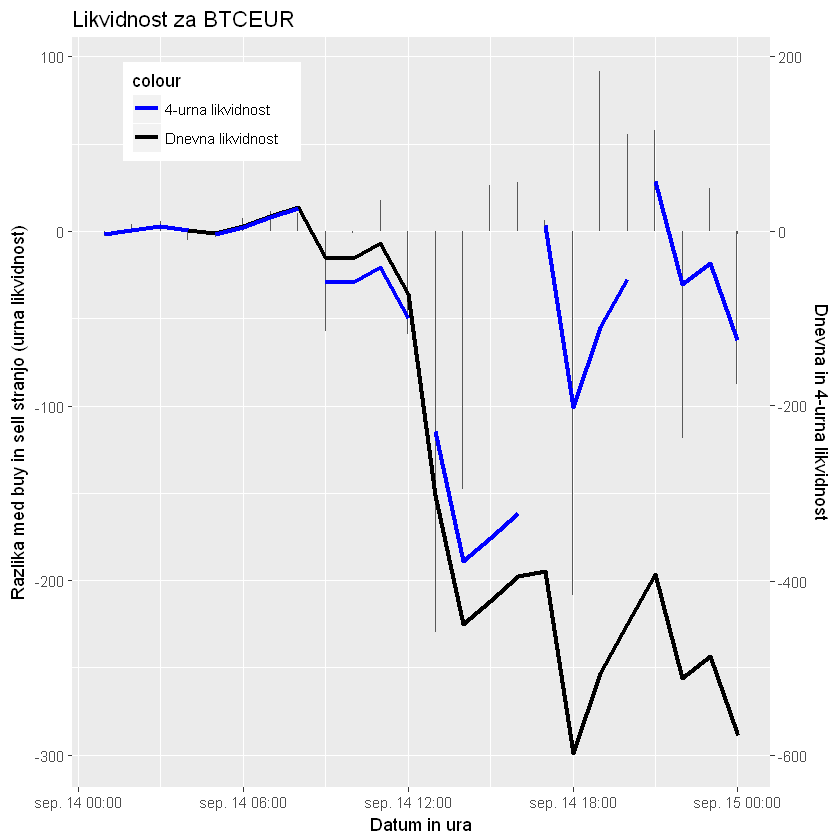

In [34]:
likvidnost(default_par)

#### 4b) Likvidnost na valuto

OPIS: vse isto kot zgoraj (tabela in graf), le da ne gledamo več po valutnem paru, temveč po posamezni valuti

In [ ]:
#KODA
likvidnost_valuta <- function(valuta) {
    valutni_pari <- c('btcusd', 'btceur', 'eurusd', 'xrpusd', 'xrpeur', 'xrpbtc', 
                      'ltcusd', 'ltceur', 'ltcbtc', 'ethusd', 'etheur', 'ethbtc')
    matching <- valutni_pari[grepl(valuta, valutni_pari)]
    matching <- paste(datum, '/', matching, '.csv', sep='')
    data <- do.call(rbind,lapply(matching,read.csv))
    data$date2 <- as.POSIXct(data$date,origin="1970-01-01",tz="GMT") 
    tmp <- split(data, cut(strptime(data$date2, format="%F %R"),"hour"))
    df <- data.frame(Date=as.Date(as.character()), buy=numeric(), sell=numeric(), stringsAsFactors=FALSE)
    for (ura in tmp) {
        tmpbuy <- ura[ura[, "type"] == 0,]
        tmpsell <- ura[ura[, "type"] == 1,]
        vec <- c(ura$date2[[1]], sum(tmpbuy$amount), sum(tmpsell$amount))
        df <- rbind(df, vec)
    }
    colnames(df)<- c("date","buy","sell")
    df$difference <- df$buy - df$sell
    df$date <- as.POSIXct(df$date,origin="1970-01-01",tz="GMT")
    df$dnevna_zaloga <- cumsum(df$difference)
    df$tmp <- c(1:nrow(df))
    df$group <- rep(0, nrow(df))
    for (i in 1:nrow(df)) {
    df$group[[i]] <- ((i - 1) %/% 4) + 1
    if (i %% 4 == 1) {
        df$tmp[[i]] = df$difference[[i]] 
    } else if (i %% 4 == 3){
        df$tmp[[i]] = df$difference[[i]] + df$difference[[i - 1]] + df$difference[[i - 2]]
    } else if (i %% 4 == 2){
        df$tmp[[i]] = df$difference[[i]] + df$difference[[i - 1]]
    } else {
        df$tmp[[i]] = df$difference[[i]] + df$difference[[i - 1]] + df$difference[[i - 2]] + df$difference[[i - 3]]
    }
    }
    colnames(df)[6] <- "stiri_urna"
    #df$stiri_urna <- rollsumr(df$difference, k=4, fill=0)
    p <- ggplot(data = df, aes(x = date)) + geom_col(aes(y=difference))
    p <- p + geom_line(aes(y=dnevna_zaloga/2, colour = "Dnevna likvidnost"), size=1.2)
    p <- p + geom_line(aes(y=stiri_urna/2, group = group, colour = "4-urna likvidnost"), size=1.2)
    p <- p + scale_y_continuous(sec.axis = sec_axis(~.*2, name = "Dnevna in 4-urna likvidnost"))
    p <- p + scale_colour_manual(values = c("blue", "black"))
    p <- p + labs(x = "Datum in ura", y = "Razlika med buy in sell stranjo (urna likvidnost)")
    p <- p + theme(legend.position = c(0.2, 0.9))
    p <- p + ggtitle(paste('Likvidnost za ', toupper(valuta), sep=''))
    print(p)
    return(df)
}

Za prikaz druge valute spremeni argument v funkciji spodaj. Funckija podpira naslednje valute:
- xrp
- eth
- ltc

*zaenkrat še ne podpira BTC. Če je tak prikaz likvidnosti zanimiv in uporaben, se potem doda v nadaljevanju tudi za BTC

date,buy,sell,difference,dnevna_zaloga,stiri_urna,group
2017-09-14 00:57:58,628.3147,419.43278,208.881965,208.88197,208.881965,1
2017-09-14 01:59:20,218.4563,300.11286,-81.656592,127.22537,127.225373,1
2017-09-14 02:59:24,377.9986,572.35612,-194.357512,-67.13214,-67.132139,1
2017-09-14 03:59:45,704.0155,987.57268,-283.557182,-350.68932,-350.689321,1
2017-09-14 04:57:48,365.0296,367.50570,-2.476083,-353.16540,-2.476083,2
2017-09-14 05:59:16,411.3076,321.80334,89.504251,-263.66115,87.028168,2
2017-09-14 06:59:05,755.8455,742.61469,13.230843,-250.43031,100.259012,2
2017-09-14 07:59:41,1016.8143,727.31470,289.499604,39.06929,389.758616,2
2017-09-14 08:58:53,947.1945,705.77451,241.420011,280.48931,241.420011,3
2017-09-14 09:59:46,1830.3613,1931.18343,-100.822125,179.66718,140.597886,3


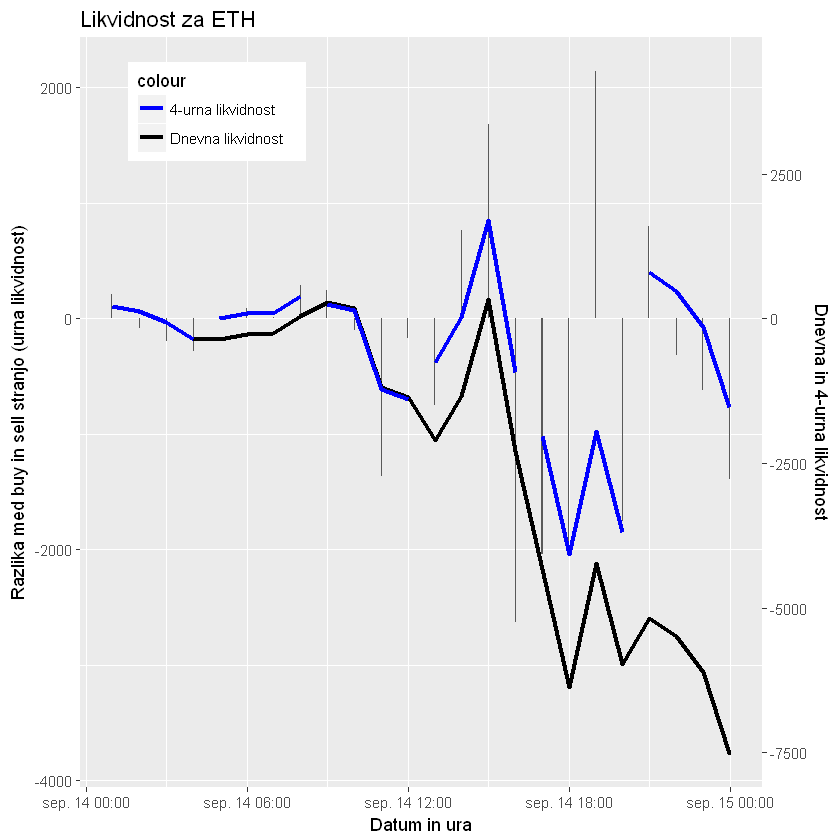

In [35]:
likvidnost_valuta('eth')

### 5) Orderji na borzi (primerjava z realizirani transakcijami)

Podatki so za eno uro. Konkretno podatki prikazani v spodnji tabeli prikazujejo dinamiko trgovanja med 12:58 in 13:58 dne 3.9.2017.

In [ ]:
order <- read.csv('orders/aggregate.csv', header=T)
order